In [24]:
import streamlit as st
import datetime
from glob import glob
from PIL import Image
import numpy as np
import base64
import io
import sys
import matplotlib.pyplot as plt

if '../app' not in sys.path:
    sys.path.append('../app/')

from utils.locate_timings import bin_confusion, confusion2transcript
from utils.identify_theme import send2chatgpt, split_confused_transcripts_by_line

In [25]:
d = input('Select a session date:')
d = datetime.datetime.strptime(str(d).replace('-', ''), "%Y%m%d")


In [26]:
d

datetime.datetime(2019, 4, 16, 0, 0)

In [27]:
select_confused_csv = '../confusion_processed/'+str(d.year)+str(d.month).zfill(2)+str(d.day).zfill(2)+'_confusion.csv'
avg_1min = bin_confusion(select_confused_csv)

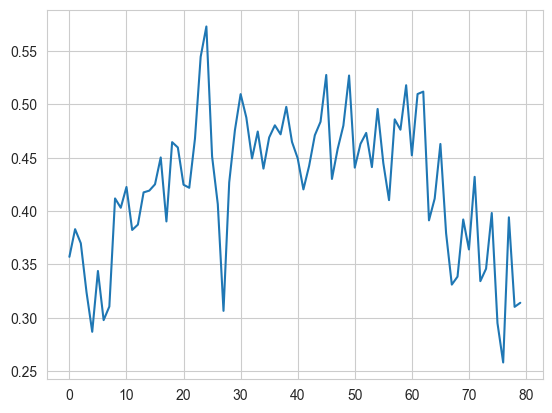

In [28]:
plt.plot(avg_1min)

In [29]:
a = np.min(avg_1min)
avg_1min_above_min = avg_1min/a
c = 2
top_confused_min = np.array(np.where(avg_1min_above_min > c)[0])

In [22]:
# a= np.mean(avg_1min)
# b = np.std(avg_1min)
# c = a+b
# top_confused_min = np.array(np.where(avg_1min > c)[0])

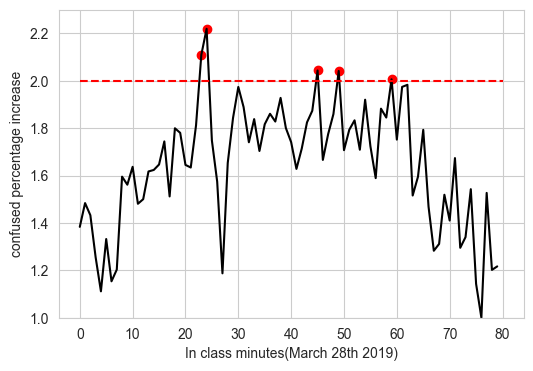

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(avg_1min_above_min, color = 'k')
ax.hlines(c, 0, 80, linestyle='dashed', label='Mean+1SD', color='red')
# ax.text(80, 7.5, 'Mean+1SD', color='red')
ax.scatter(top_confused_min, np.array(avg_1min_above_min)[top_confused_min], color='red', marker='o')
ax.set_xlabel('In class minutes(March 28th 2019)')
ax.set_ylabel('confused percentage increase')
ax.set_ylim([1.0, 2.3])
fig.savefig('../figure_panels/fig4d_new.svg', bbox_inches='tight', dpi=300)

In [18]:
avg_1min[np.array(top_confused_min)]

TypeError: only integer scalar arrays can be converted to a scalar index